# 景気後退と失業

by [kenjisato](https://www.kenjisato.jp)

マンキュー『マクロ経済学 I 入門編』 第8章の図を再現する。

このノートブックを動かすには [Anaconda](https://www.anaconda.com/products/individual) を使うのが簡単。conda で [pandas-datareader](https://pydata.github.io/pandas-datareader/) をインストールする。

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### 景気後退期の期間

日本の景気循環は内閣府が「景気基準日付」として発表している。

内閣府「景気基準日付」https://www.esri.cao.go.jp/jp/stat/di/150724hiduke.html (Accessed on 2020-06-27)

In [2]:
recessions_jp = [['1951-06', '1951-10'],
                 ['1954-01', '1954-11'],
                 ['1957-06', '1958-06'],
                 ['1961-12', '1962-10'],
                 ['1964-10', '1965-10'],
                 ['1970-07', '1971-12'],
                 ['1973-11', '1975-03'],
                 ['1977-01', '1977-10'],
                 ['1980-02', '1983-02'],
                 ['1985-06', '1986-11'],
                 ['1991-02', '1993-10'],
                 ['1997-05', '1999-01'],
                 ['2000-11', '2002-01'],
                 ['2008-02', '2009-03'],
                 ['2012-03', '2012-11']]

### 失業率のデータ
 
OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en (Accessed on 2020-06-27)
Copyright, 2016, OECD. Reprinted with permission.

pandas-datareader を使って St. Louis FED ([FRED](https://fred.stlouisfed.org/)) から取得する。データのダウンロードにはデータコードが必要。ウェブサイトで検索すれば，日本の失業率のデータコードは `LRUN64TTJPM156S` と分かる。

総務省の調査結果が元になっているので，日本政府の情報公開サイトからも取得できる。FRED の API を使う方が簡単なので，ここでは海外サイトから取得にしている。

In [3]:
unemp = pdr.get_data_fred("LRUN64TTJPM156S", start="1970-01")
unemp.index = unemp.index.to_period('M')
unemp.tail()

,LRUN64TTJPM156S
DATE,
2019-12,2.3
2020-01,2.5
2020-02,2.5
2020-03,2.6
2020-04,2.7


### 作図

失業率の時系列図をプロットするコードは以下の通り。

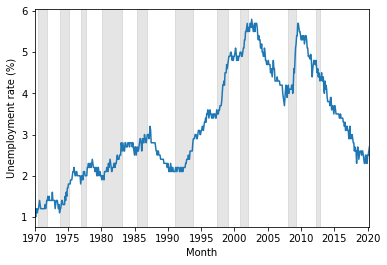

In [4]:
fig, ax = plt.subplots()

unemp.plot(ax=ax, legend=None);
ax.set_ylabel("Unemployment rate (%)")
ax.set_xlabel("Month")
for (start, end) in recessions_jp:
    ax.axvspan(start, end, alpha=0.2, color='gray')

ax.set_xticks([], minor=True)
dates = pd.date_range('1970', '2020', freq=pd.DateOffset(years=5))
ax.xaxis.set_ticks(dates)
ax.xaxis.set_ticklabels(dates.strftime('%Y'));

灰色の帯が内閣府が「景気後退期」としている時期にあたる。景気後退期において失業率が大きく拡大していることを確認する。

## 失業と実質GDPの関係

In [5]:
gdp = pdr.get_data_fred("JPNRGDPEXP", start="1970-01-01")
gdp.index = gdp.index.to_period('Q')
gdp.tail()

,JPNRGDPEXP
DATE,
2019Q1,536552.8
2019Q2,539412.1
2019Q3,539432.9
2019Q4,529417.9
2020Q1,526425.8


1994年以降の実質GDPと失業率をプロットしてみると，実質GDPの減少と失業率の上昇が同時に起こることが分かる。

ただし，2012年の景気後退期は目立った失業の増加は見られない。（なぜ？）

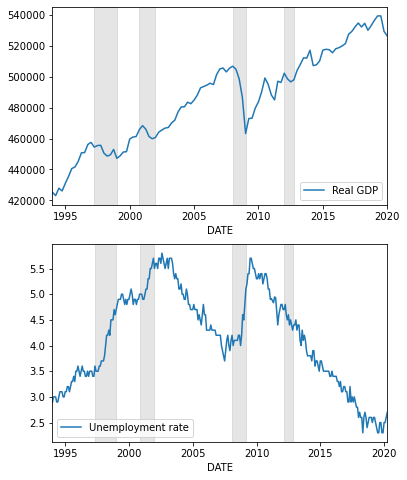

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
gdp.plot(ax=axes[0])
unemp.loc['1994-01-01':].plot(ax=axes[1])

for ax in axes:
    for (start, end) in recessions_jp:
        ax.axvspan(start, end, alpha=0.2, color='gray')

    ax.set_xticks([], minor=True)
    dates = pd.date_range('1995', '2020', freq=pd.DateOffset(years=5))
    ax.xaxis.set_ticks(dates)
    ax.xaxis.set_ticklabels(dates.strftime('%Y'));
    
axes[0].legend(["Real GDP"])
axes[1].legend(["Unemployment rate"])